In [11]:
import pandas as pd

In [ ]:
# ---------------------------------------------
1. Larger discounts generally increase units sold, but the effect diminishes at higher discount levels.
2. Revenue curve often has an inverted-U shape: revenue rises with moderate discounts but falls if discounts are too high.
3. The "sweet spot" discount maximizes revenue — beyond this, increasing discounts can hurt total revenue.
4. This helps plan optimal promotions that balance volume growth and profitability.

In [8]:
df = pd.read_csv("Sales Data.csv")

In [9]:
df

,TransactionDate,MRP,NoPromoPrice,SellingPrice,UnitsSold
0,01-01-2021,99.0,97.95,97.95,12
1,02-01-2021,99.0,85.09,85.09,10
2,03-01-2021,99.0,92.93,92.93,4
3,04-01-2021,99.0,90.24,90.24,7
4,05-01-2021,99.0,92.67,92.67,12
...,...,...,...,...,...
1090,27-12-2023,115.7,90.16,90.16,8
1091,28-12-2023,115.7,87.15,87.15,7
1092,29-12-2023,115.7,89.97,89.97,12
1093,30-12-2023,115.7,97.22,97.22,9


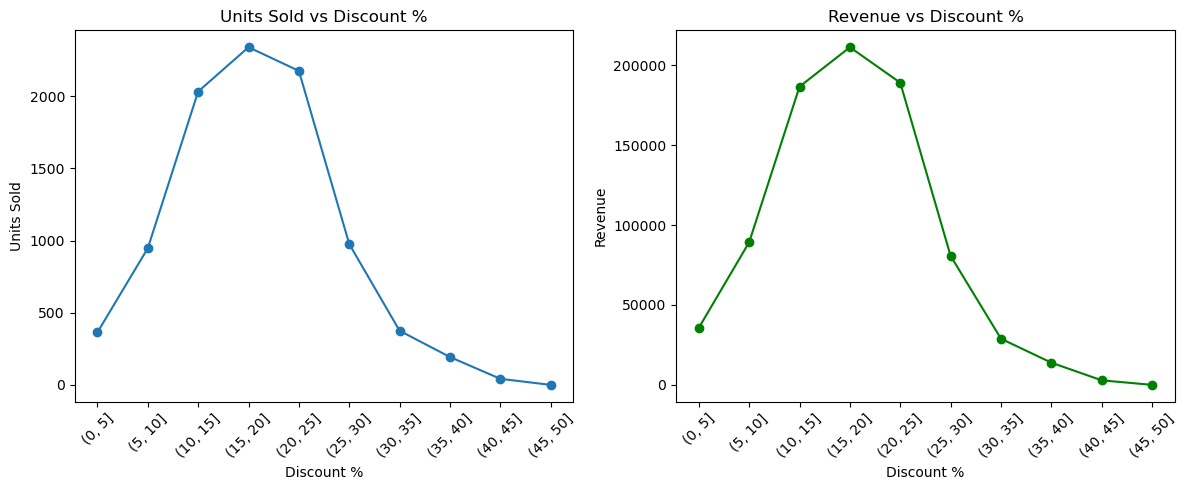

Sweet Spot Discount Bin: (15, 20]
Revenue at Sweet Spot: 211240.75


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming your data is loaded as df
# df = pd.read_csv("your_data.csv")

# 1. Calculate discount %
df['DiscountPct'] = ((df['MRP'] - df['SellingPrice']) / df['MRP']) * 100

# 2. Compute daily revenue
df['Revenue'] = df['UnitsSold'] * df['SellingPrice']

# 3. Optionally aggregate by discount bins to reduce noise
bins = np.arange(0, 55, 5)  # 0%,5%,10%...50%
df['DiscountBin'] = pd.cut(df['DiscountPct'], bins)

agg = df.groupby('DiscountBin').agg({
    'UnitsSold': 'sum',
    'Revenue': 'sum'
}).reset_index()

# 4. Plot Units Sold vs Discount %
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(agg['DiscountBin'].astype(str), agg['UnitsSold'], marker='o')
plt.xticks(rotation=45)
plt.xlabel('Discount %')
plt.ylabel('Units Sold')
plt.title('Units Sold vs Discount %')

# 5. Plot Revenue vs Discount %
plt.subplot(1,2,2)
plt.plot(agg['DiscountBin'].astype(str), agg['Revenue'], marker='o', color='green')
plt.xticks(rotation=45)
plt.xlabel('Discount %')
plt.ylabel('Revenue')
plt.title('Revenue vs Discount %')
plt.tight_layout()
plt.show()

# 6. Optional: find sweet spot for revenue
sweet_spot = agg.loc[agg['Revenue'].idxmax()]
print("Sweet Spot Discount Bin:", sweet_spot['DiscountBin'])
print("Revenue at Sweet Spot:", sweet_spot['Revenue'])
